# Sentinel 2 L2A data in AGDCv2 

The files that where used for ingestion are following:   
 - dataset_type: [s2_l2a_granules.yaml](https://github.com/hkristen/docs/config_samples/dataset_types/s2_l2a_granules.yaml)
 - preparation: [sen2cor_23_prepare.py](https://github.com/hkristen/utils/sen2cor_23_prepare.py)
 - ingester: [s2a_sen2cor_23_t32tps_20m_ingest.yaml](https://github.com/hkristen/docs/config_samples/ingester/s2a_sen2cor_23_t32tps_20m_ingest.yaml) & [s2a_sen2cor_23_t32tps_10m_ingest.yaml](https://github.com/hkristen/docs/config_samples/ingester/s2a_sen2cor_23_t32tps_10m_ingest.yaml)

Following datasets where imported

```
S2A_USER_PRD_MSIL2A_PDMC_20161009T203405_R065_V20161009T102022_20161009T102522.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161013T105355_R065_V20160919T102022_20160919T102112.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161018T105529_R022_V20161016T101022_20161016T101019.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161019T201128_R065_V20150915T102026_20150915T102026.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161028T110122_R022_V20161026T101112_20161026T101112.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161029T195843_R065_V20161029T102132_20161029T102132.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161109T225541_R065_V20161108T102232_20161108T102232.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161115T190438_R022_V20161115T101302_20161115T101302.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161118T120558_R065_V20161019T102032_20161019T102032.SAFE
S2A_USER_PRD_MSIL2A_PDMC_20161118T201818_R065_V20161118T102322_20161118T102322.SAFE
```

You can find one metadata file that was written by sen2cor_23_prepare.py here:
[agdc-metadata.yaml](https://github.com/hkristen/utils/agdc-metadata.yaml)

In [1]:
import matplotlib
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import datacube
import xarray

In [2]:
dc = datacube.Datacube(app='sentinel2')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://hkristen@:5432/datacube)>>>

## Datacube products & measurements
The Datacube provides pandas.DataFrame representations of the available products and measurements.


In [3]:
dc.list_products()

,name,description,instrument,lon,platform,format,lat,time,product_type,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
1,s2a_sen2cor_23_no_dem_yes_cirrus,Sentinel-2 Level 2 - Sen2Cor Bottom of Atmosph...,MSI,None,SENTINEL_2A,JPEG2000,None,None,S2MSI2Ap,NaN,NaN,NaN,NaN
3,s2a_sen2cor_23_t32tps_10m,"Sentinel-2A USER PRD MSI2A 10 metre, 10km tile...",MSI,None,SENTINEL_2A,NetCDF,None,None,S2MSI2Ap,EPSG:32633,"[-10, 10]","[10000.0, 10000.0]","(y, x)"
2,s2a_sen2cor_23_t32tps_20m,"Sentinel-2A USER PRD MSI2A 20 metre, 10km tile...",MSI,None,SENTINEL_2A,NetCDF,None,None,S2MSI2Ap,EPSG:32633,"[-10, 10]","[10000.0, 10000.0]","(y, x)"


## Datacube Measurements

The list of measurements stored in the datacube can also be listed.

Measurements are also known as bands in the imagery domain, and data variables when stored in NetCDF files or when working with xarray.Dataset objects.


In [4]:
dc.list_measurements()

aliases   dtype  \
product                          measurement                                  
s2a_sen2cor_23_no_dem_yes_cirrus B02_10m                        NaN  uint16   
                                 B02_20m                        NaN  uint16   
                                 B03_10m      [band_03, B03, Band3]  uint16   
                                 B03_20m                        NaN  uint16   
                                 B04_10m                        NaN  uint16   
                                 B04_20m                        NaN  uint16   
                                 B05_20m                        NaN  uint16   
                                 B06_20m                        NaN  uint16   
                                 B07_20m                        NaN  uint16   
                                 B08_10m                        NaN  uint16   
                                 B8A_20m                        NaN  uint16   
                                 B11_20m                        NaN  uint16   
                                 B12_20m                        NaN  uint16   
s2a_sen2cor_23_t32tps_10m        B02_10m                        NaN   int16   
                                 B03_10m      [band_03, B03, Band3]   int16   
                                 B04_10m                        NaN   int16   
                                 B08_10m                        NaN   int16   
s2a_sen2cor_23_t32tps_20m        B02                            NaN   int16   
                                 B03                            NaN   int16   
                                 B04                            NaN   int16   
                                 B05                            NaN   int16   
                                 B06                            NaN   int16   
                                 B07                            NaN   int16   
                                 B08A                           NaN   int16   
                                 B11                            NaN   int16   
                                 B12                            NaN   int16   

                                                 name  nodata  \
product                          measurement                    
s2a_sen2cor_23_no_dem_yes_cirrus B02_10m      B02_10m       0   
                                 B02_20m      B02_20m       0   
                                 B03_10m      B03_10m       0   
                                 B03_20m      B03_20m       0   
                                 B04_10m      B04_10m       0   
                                 B04_20m      B04_20m       0   
                                 B05_20m      B05_20m       0   
                                 B06_20m      B06_20m       0   
                                 B07_20m      B07_20m       0   
                                 B08_10m      B08_10m       0   
                                 B8A_20m      B8A_20m       0   
                                 B11_20m      B11_20m       0   
                                 B12_20m      B12_20m       0   
s2a_sen2cor_23_t32tps_10m        B02_10m      B02_10m    -999   
                                 B03_10m      B03_10m    -999   
                                 B04_10m      B04_10m    -999   
                                 B08_10m      B08_10m    -999   
s2a_sen2cor_23_t32tps_20m        B02              B02    -999   
                                 B03              B03    -999   
                                 B04              B04    -999   
                                 B05              B05    -999   
                                 B06              B06    -999   
                                 B07              B07    -999   
                                 B08A            B08A    -999   
                                 B11              B11    -999   
                                 B12              B12    -999   

                          

## Plotting data


Create plot variable of ONE timestep and show extents

In [3]:
s2a_plot = dc.load(product='s2a_sen2cor_23_t32tps_20m', time=('2016-10-26T10:12:56.085000000'), measurements=['B04'], group_by='solar_day')
s2a_plot.extent

Geometry(POLYGON ((135070 5209850,135070 5091930,252990 5091930,252990 5209850,135070 5209850)), EPSG:32633)

#### Extents according to QGIS


600000.0000000000000000,5090220.0000000000000000 : 709800.0000000000000000,5200020.0000000000000000


#### Extents according too gdalinfo

Corner Coordinates:
Upper Left  (  600000.000, 5200020.000) ( 10d18'50.53"E, 46d56'46.21"N)
Lower Left  (  600000.000, 5090220.000) ( 10d17'25.74"E, 45d57'29.75"N)
Upper Right (  709800.000, 5200020.000) ( 11d45'20.11"E, 46d55'13.93"N)
Lower Right (  709800.000, 5090220.000) ( 11d42'22.52"E, 45d56' 0.59"N)
Center      (  654900.000, 5145120.000) ( 11d 0'59.72"E, 46d26'30.73"N)


In [4]:
s2a_plot.B04.x

<xarray.DataArray 'x' (x: 11792)>
array([ 135075.,  135085.,  135095., ...,  252965.,  252975.,  252985.])
Coordinates:
  * x        (x) float64 1.351e+05 1.351e+05 1.351e+05 1.351e+05 1.351e+05 ...
Attributes:
    units: metre

In [9]:
s2a_plot.B04

<xarray.DataArray 'B04' (time: 1, y: 11792, x: 11792)>
array([[[-999, -999, ..., -999, -999],
        [-999, -999, ..., -999, -999],
        ..., 
        [-999, -999, ..., -999, -999],
        [-999, -999, ..., -999, -999]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2016-10-26T10:12:56.085000
  * y        (y) float64 5.21e+06 5.21e+06 5.21e+06 5.21e+06 5.21e+06 ...
  * x        (x) float64 1.351e+05 1.351e+05 1.351e+05 1.351e+05 1.351e+05 ...
Attributes:
    units: 1
    crs: EPSG:32633
    nodata: -999
    spectral_definition: {'response': [0.002584, 0.034529, 0.14997, 0.464826, 0.817746, 0.965324, 0.983869, 0.9969, 1.0, 0.995449, 0.991334, 0.977215, 0.936802, 0.873776, 0.814166, 0.776669, 0.764864, 0.775091, 0.801359, 0.830828, 0.857112, 0.883581, 0.90895, 0.934759, 0.955931, 0.96811, 0.973219, 0.971572, 0.969003, 0.965712, 0.960481, 0.944811, 0.884152, 0.706167, 0.422967, 0.189853, 0.063172, 0.020615, 0.002034], 'wavelength': [646, 647, 648, 649, 650, 651, 652, 


Now we can plot the image, be carfeul to use plot.imshow() as the "normal" function plot() can´t handle such a big array! 


In [4]:
plt.figure(figsize=(50, 50))

In [ ]:
s2a_plot.B04.isel(time=0).plot.imshow()

In [ ]:
plt.imshow(s2a_plot.B04.isel(time=0))

In [ ]:
plt.savefig('test.png')

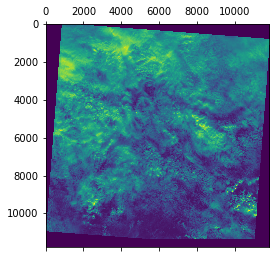

In [18]:
plt.matshow(s2a_plot.B04.isel(time=0))

In [4]:
plt.matshow(s2a_plot.B04.isel(time=0))

<IPython.core.display.Javascript object>

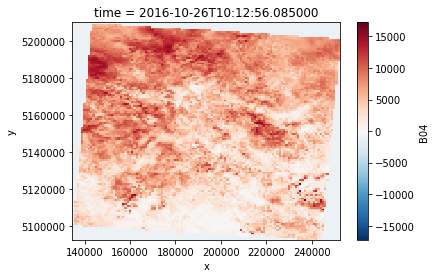

In [4]:
s2a_plot.B04[0, ::100, ::100].plot.imshow()

In [ ]:
### the extent of the plot is wrong!!! but why??

### Plot a histogram

(array([  1.82843490e+07,   7.77428200e+06,   8.83456600e+06,
          9.12521600e+06,   9.74888000e+06,   1.01568530e+07,
          1.07445610e+07,   1.13476490e+07,   1.19568720e+07,
          1.13248250e+07,   1.01214390e+07,   7.49349900e+06,
          4.88492800e+06,   3.23588600e+06,   1.98995100e+06,
          1.16086600e+06,   6.05400000e+05,   2.15938000e+05,
          3.34450000e+04,   1.18590000e+04]),
 array([  -999. ,    -87.4,    824.2,   1735.8,   2647.4,   3559. ,
          4470.6,   5382.2,   6293.8,   7205.4,   8117. ,   9028.6,
          9940.2,  10851.8,  11763.4,  12675. ,  13586.6,  14498.2,
         15409.8,  16321.4,  17233. ]),
 <a list of 20 Patch objects>)

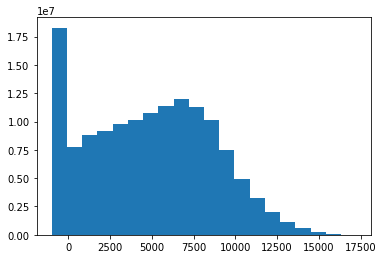

In [14]:
plt.hist(s2a_plot.B04, bins =20)

### Calculate NDVI

Calculate NDVI as shown in [examples](https://github.com/data-cube/agdc-v2-examples/blob/eab9269e56cbbdb8a60c9503f0374e6da7535ee7/notebooks/Datacube_Summary.ipynb)

In [5]:
two_bands = dc.load(product='s2a_sen2cor_23_t32tps_10m', time=('2016-10-26T10:12:56.085000000'), measurements=['B04_10m', 'B08_10m'], group_by='solar_day')
two_bands

<xarray.Dataset>
Dimensions:  (time: 1, x: 11792, y: 11792)
Coordinates:
  * time     (time) datetime64[ns] 2016-10-26T10:12:56.085000
  * y        (y) float64 5.21e+06 5.21e+06 5.21e+06 5.21e+06 5.21e+06 ...
  * x        (x) float64 1.351e+05 1.351e+05 1.351e+05 1.351e+05 1.351e+05 ...
Data variables:
    B04_10m  (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    B08_10m  (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
Attributes:
    crs: EPSG:32633

In [6]:
red = two_bands.B04_10m
nir = two_bands.B08_10m

print(red.mean())
print(nir.mean())

<xarray.DataArray 'B04_10m' ()>
array(4830.577284698397)
<xarray.DataArray 'B08_10m' ()>
array(5117.729009647837)


In [7]:
ndvi = ((nir - red) / (nir + red))
ndvi

<xarray.DataArray (time: 1, y: 11792, x: 11792)>
array([[[-0., -0., ..., -0., -0.],
        [-0., -0., ..., -0., -0.],
        ..., 
        [-0., -0., ..., -0., -0.],
        [-0., -0., ..., -0., -0.]]])
Coordinates:
  * time     (time) datetime64[ns] 2016-10-26T10:12:56.085000
  * y        (y) float64 5.21e+06 5.21e+06 5.21e+06 5.21e+06 5.21e+06 ...
  * x        (x) float64 1.351e+05 1.351e+05 1.351e+05 1.351e+05 1.351e+05 ...

(array([  8.39000000e+02,   2.64000000e+02,   3.09000000e+02,
          3.43000000e+02,   4.00000000e+02,   4.63000000e+02,
          7.23000000e+02,   1.87500000e+03,   2.27970000e+04,
          5.92152820e+07,   4.89417980e+07,   1.27891310e+07,
          6.56665300e+06,   4.00611500e+06,   2.55263000e+06,
          1.78227200e+06,   1.20473000e+06,   7.35322000e+05,
          4.30659000e+05,   7.98659000e+05]),
 array([-0.99580713, -0.89603808, -0.79626904, -0.6965    , -0.59673095,
        -0.49696191, -0.39719287, -0.29742382, -0.19765478, -0.09788574,
         0.00188331,  0.10165235,  0.20142139,  0.30119044,  0.40095948,
         0.50072852,  0.60049757,  0.70026661,  0.80003566,  0.8998047 ,
         0.99957374]),
 <a list of 20 Patch objects>)

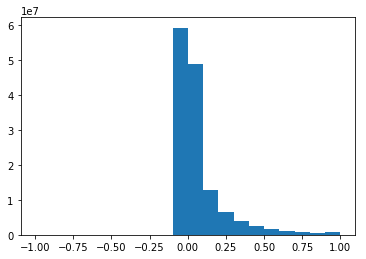

In [6]:
plt.hist(ndvi, bins=20)

In [7]:
ndvi.mean()

<xarray.DataArray ()>
array(0.0765719931338179)

In [8]:
np.std(ndvi)

<xarray.DataArray ()>
array(0.15893948442418804)

In [10]:
#This controls the colour maps used for plotting NDVI
ndvi_cmap = matplotlib.colors.ListedColormap(['blue', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600'])
ndvi_bounds = [-1, 0, 0.1, 0.25, 0.35, 0.5, 0.8, 1]
ndvi_norm = matplotlib.colors.BoundaryNorm(ndvi_bounds, ndvi_cmap.N)

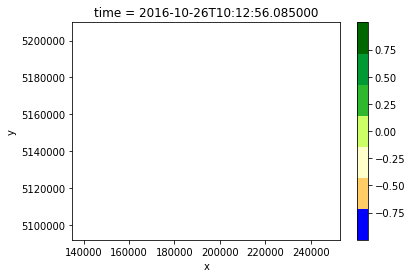

In [7]:
ndvi.plot(cmap = ndvi_cmap)
# Somehow produces an empty plot??

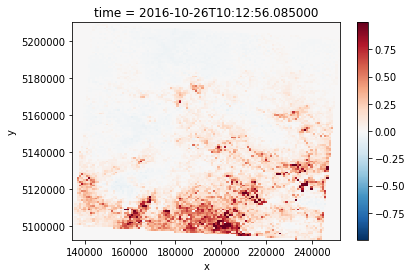

In [8]:
ndvi[0, ::100, ::100].plot.imshow()

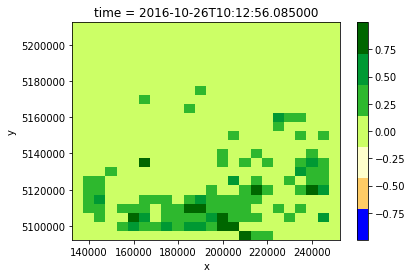

In [18]:
ndvi[0, ::500, ::500].plot.imshow(cmap = ndvi_cmap)

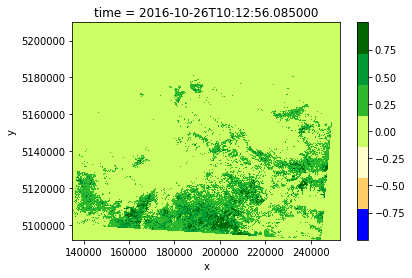

In [20]:
ndvi[0, ::5, ::5].plot.imshow(cmap = ndvi_cmap)
plt.savefig('ndvi.png')

In [21]:
s2a_plot = dc.load(product='s2a_sen2cor_23_t32tps_20m', time=('2016-10-26T10:12:56.085000000'), measurements=['B04'],resolution=(50,-50), resampling='cubic', group_by='solar_day')
s2a_plot.extent

Geometry(POLYGON ((253000 5091900,253000 5209850,135050 5209850,135050 5091900,253000 5091900)), EPSG:32633)

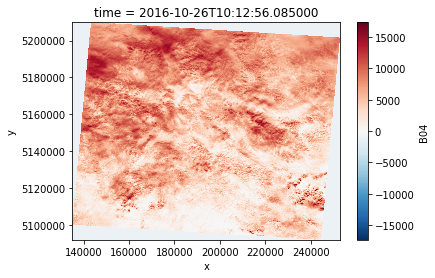

In [29]:
s2a_plot.B04[0, :, :].plot.imshow()